# Notação

Considerando $I$ uma imagem no domínio $\Omega \subset \mathbb{R}^2$, podemos definir $G$ e $S$ como o conjunto dos píxels na pastílha e $S$ o conjunto de píxels segmentados pela rede, respectivamente. Considere também $g_i^{(c)}$ e $s_i^{(c)}$ o ground-truth e a segmentação, respectivamente, no píxel $i$ com relação à classe $c$. $N$ corresponde ao número total de píxels na image e $C$ o conjunto das classes, $C = \{0, 1\}$ (classificação binária).

[//]: # "Seja $I$ uma imagem no domínio $\Omega \subset \mathbb{R}^2$, $S$ e $G$ são o resultado da segmentação e o ground-truth, respectivamente. Nesse sentido, $s_i$ e $g_i$ são o resultado da segmentação e o ground truth de um determinado píxel $i$, respectivamente. $N$ é o número de píxels na imagem e $C$ é o conjunto das classes. Para este caso em específico, por se tratar de uma classificação binária, $C = \{0, 1\}$ (considere $1$ a região da pastílha e $0$ a regição do papel)."

A segmentação pode ser descrita da seguinte forma:
$$
s_i^{(c)} = \left\{\begin{array}{r, l}
    \hat{y}_i,&\text{ se } c = 1 \text{ (pastílha)} \\
    1 - \hat{y}_i,&\text{ se } c = 0 \text{ (papel)}
\end{array}\right.
$$
onde $\hat{y}_i$ é uma estimativa da probabilidade do píxel $i$ pertencer ao conjunto $G$: $$\hat{y}_i = P(i|i\in G) \Longrightarrow 0\le \hat{y}_i \le 1.$$
Tal estimativa é fornecida pelo modelo $\hat{Y}: I \to \{\hat{y}_1,\dots , \hat{y}_N\}$.

Os ground-truths $g_i^{(c)}$ tomam a seguinte forma:
$$
g_i^{(1)} = \left\{\begin{array}{r, l}
    1,&\text{ se } i \in G\\
    0,&\text{ se } i \notin G
\end{array}\right.
\quad
\text{,}
\quad
\text{e}
\quad
g_i^{(0)} = \left\{\begin{array}{r, l}
    1,&\text{ se } i \notin G\\
    0,&\text{ se } i \in G
\end{array}\right.
$$
e possue se relacionam de modo que $g_i^{(0)} = 1 - g_i^{(1)}$.

Propriedades:
- Interseção: $\sum_{i=1}^N g_i^{(c)}s_i^{(c)} = 
\left\{\begin{array}{r, l}
    \sum_{i\in G} \hat{y}_i ,&\text{ se } c = 1\\
    \sum_{i\notin G} (1 - \hat{y}_i) ,&\text{ se } c = 0
\end{array}\right.$

# Metrics

## Iou (Intersection over Union)

- Definição geral:

$$
\text{IoU}(G, S) = \frac{|G \cap S|}{|G \cup S|}
$$

- Segmentação contínua:
$$
\begin{align}
\text{IoU}(G, S) &\approx 
\frac{
    \sum_{c\in C}\sum_{i=1}^N g_i^{(c)}s_i^{(c)}
}{
    \sum_{c\in C}\sum_{i=1}^N \left(g_i^{(c)} + s_i^{(c)} - g_i^{(c)}s_i^{(c)}\right)
}\\ &=
\frac{
    \sum_{i=1}^N g_i^{(1)}s_i^{(1)} + \sum_{i=1}^N g_i^{(0)}s_i^{(0)}
}{
    \sum_{c\in C}\sum_{i=1}^N g_i^{(c)} + 
    \sum_{c\in C}\sum_{i=1}^N s_i^{(c)}\left(1 - g_i^{(c)}\right)
}\\ &=
\frac{
    \sum_{i\,\in\,G} \hat{y}_i + \sum_{i\,\notin\,G} (1 - \hat{y}_i)
}{
    \sum_{i=1}^N g_i^{(1)} + \sum_{i=1}^N g_i^{(0)} + 
    \sum_{i=1}^N s_i^{(1)}g_i^{(0)} +
    \sum_{i=1}^N s_i^{(0)}g_i^{(1)}
}\\ &=
\frac{
    \sum_{i\,\in\,G} \hat{y}_i + \sum_{i\,\notin\,G} (1 - \hat{y}_i)
}{
    \sum_{i=1}^N g_i^{(0)}\left(1 + s_i^{(1)}\right) +
    \sum_{i=1}^N g_i^{(1)}\left(1 + s_i^{(0)}\right)
}\\ &=
\frac{
    \sum_{i\,\in\,G} \hat{y}_i + \sum_{i\,\notin\,G} (1 - \hat{y}_i)
}{
    \sum_{i\,\notin\,G} \left(1 + \hat{y}_i\right) +
    \sum_{i\,\in\,G} \left[1 + (1 - \hat{y}_i)\right]
}\\ &= \boxed{
    \frac{
        \sum_{i\,\in\,G} \hat{y}_i + \sum_{i\,\notin\,G} (1 - \hat{y}_i)
    }{
        \sum_{i\,\notin\,G} \left(1 + \hat{y}_i\right) +
        \sum_{i\,\in\,G} \left(2 - \hat{y}_i\right)
    }
}
\end{align}
$$

- Limites:
$$
\left.\begin{array}{l}
    \lim_{S \to G} \text{IoU}(G, S) 
    = \frac{
        \sum_{i\in G} 1 \,+\, \sum_{i\notin G}(1 - 0)
    }{
        \sum_{i\notin G}(1 + 0) \,+\, \sum_{i\in G}(2 - 1)
    } 
    = \frac{|G| + (N - |G|)}{(N - |G|) + |G|}
    = 1
    \\
    \lim_{|S-G| \to N} \text{IoU}(G, S) 
    = \frac{
        \sum_{i\in G} 0 \,+\, \sum_{i\notin G}(1 - 1)
    }{
        \sum_{i\notin G}(1 + 1) \,+\, \sum_{i\in G}(2 - 0)
    }
    = \frac{0}{2(N - |G|) + 2|G|}
    = 0
\end{array}\right\}
\boxed{0 \le \text{IoU}(G, S) \le 1}
$$

## DSC (Dice Similarity Coefficient)

- Definição geral:
$$
\text{DSC}(G, S) = \frac{2|G \cap S|}{|G| + |S|}
$$

- Segmentação contínua:
$$
\begin{align}
    \text{DSC}(G, S) &\approx
    \frac{
        2\sum_{c\in C}\sum_{i=1}^{N}g_i^{(c)} s_i^{(c)}
    }{
        \sum_{c\in C}\sum_{i=1}^{N}g_i^{(c)} + \sum_{c\in C}\sum_{i=1}^{N}s_i^{(c)}
    }\\
    &= \frac{
        2\sum_{i=1}^{N}g_i y_i
    }{
        \sum_{i=1}^{N}g_i + \sum_{i=1}^{N}y_i
    }\\
\end{align}
$$

$$
\begin{align}
    \text{DSC}(G, S) &\approx
    \frac{
        2\sum_{c\in C}\sum_{i=1}^{N}g_i^{(c)} s_i^{(c)}
    }{
        \sum_{c\in C}\sum_{i=1}^{N}g_i^{(c)} + \sum_{c\in C}\sum_{i=1}^{N}s_i^{(c)}
    }\\
    &= \frac{
        2\left[
            \sum_{i=1}^{N}g_i^{(1)} s_i^{(1)} + 
            \sum_{i=1}^{N}g_i^{(0)} s_i^{(0)}
        \right]
    }{
        \left[
            \sum_{i=1}^{N}g_i^{(1)} + \sum_{i=1}^{N}g_i^{(0)}
        \right] 
        +
        \left[
            \sum_{i=1}^{N}s_i^{(1)} + \sum_{i=1}^{N}s_i^{(0)}
        \right]
    }\\
    &= \frac{
        2\left[
            \sum_{i\,\in\,G} \hat{y}_i + 
            \sum_{i\,\notin\,G} (1 - \hat{y}_i)
        \right]
    }{
        \left( \sum_{i\,\in\,G} 1\right) 
        +
        \left( \sum_{i\,\notin\,G} 1\right)
        +
        \sum_{i=1}^{N}\hat{y}_i + \sum_{i=1}^{N}(1 - \hat{y}_i)
    }\\
    &= \frac{
        2\left[
            \sum_{i\,\in\,G} \hat{y}_i + 
            \sum_{i\,\notin\,G} (1 - \hat{y}_i)
        \right]
    }{
        N + \sum_{i=1}^{N}(\hat{y}_i + 1 - \hat{y}_i)
    }\\
    &= \frac{
        2\left[
            \sum_{i\,\in\,G} \hat{y}_i + 
            \sum_{i\,\notin\,G} (1 - \hat{y}_i)
        \right]
    }{
        N + N
    }\\
    &= \frac{1}{N}\left[
            \sum_{i\,\in\,G} \hat{y}_i + 
            \sum_{i\,\notin\,G} (1 - \hat{y}_i)
        \right]\\
    &= \text{mean}\left(\left\{\begin{array}{r, l}
    \hat{y}_i,& \forall\, i \in G\\
    1 - \hat{y}_i,& \forall\, i \notin G
\end{array}\right.\right)
\end{align}
$$

- Limites:
$$
\left.\begin{array}{l}
    \lim_{S \to G} \text{DSC}(G, S) = \frac{1}{N}\left[
            \sum_{i\,\in\,G} 1 + 
            \sum_{i\,\notin\,G} (1 - 0)
    \right] = \frac{N}{N} = 1\\
    \lim_{|S-G| \to N} \text{DSC}(G, S) = \frac{1}{N}\left[
            \sum_{i\,\in\,G} 0 + 
            \sum_{i\,\notin\,G} (1 - 1)
    \right] = \frac{0}{N} = 0
\end{array}\right\}
\boxed{0 \le \text{DSC}(G, S) \le 1}
$$

In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd /content/drive/MyDrive/Github/PAC/cnn

/content/drive/MyDrive/Github/PAC/cnn


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import Loss
from tensorflow.keras.metrics import binary_crossentropy
import matplotlib.pyplot as plt
from src.data import load_dataset
from src.segmentation import UNet
from src.visualize import plot_training, set_custom_style
from src import metrics
set_custom_style()

In [3]:
@tf.function
def IoU(g, y):
    return tf.math.reduce_sum(g*y + (1 - g)*(1 - y), axis=(1, 2, 3))/tf.math.reduce_sum(1 + y*(1 - g) + g*(1 - y), axis=(1, 2, 3))

@tf.function
def DSC(g, y):
    return tf.math.reduce_mean(g*y + (1 - g)*(1 - y), axis=(1, 2, 3))

In [4]:
%%time
dataset = (x_train, y_train), (x_test, y_test) = load_dataset(augmentation=True, grayscale=True, as_tensor=True, norm=True)

CPU times: user 1.08 s, sys: 444 ms, total: 1.53 s
Wall time: 1.53 s


# Dice Loss

De acordo com [Loss odyssey](https://doi.org/10.1016/j.media.2021.102035), a função de perda Dice $L_{Dice}$ pode ser definida como
$$
L_{Dice} = 1 - \dfrac{2\sum_{c\,\in\,C}\sum_{i=1}^{N}g_i^{(c)} s_i^{(c)}}{\sum_{c\,\in\,C}\sum_{i=1}^{N}g_i^{(c)} + \sum_{c\,\in\,C}\sum_{i=1}^{N}s_i^{(c)}}.
$$

Simplificando, temos
$$
\boxed{
L_{Dice} = 1 - \text{DSC}(G, S).
}
$$

Então, observa-se que a função $L_{Dice}$ é restrita a valores bem definidos, pois, dado os limites
$$
\lim_{S\,\to\,G} L_{Dice} =
1 - \dfrac{1}{N}\left[
    \sum_{i\,\in\,G} 1 + 
    \sum_{i\,\notin\,G} (1 - 0)
\right]
= 
1 - \frac{N_{TP} + N_{TN}}{N} = 1 - \frac{N}{N} = 0
$$
e
$$
\lim_{|S - G|\,\to\,N} L_{Dice} =
1 - \dfrac{1}{N}\left[
    \sum_{i\,\in\,G} 0 + 
    \sum_{i\,\notin\,G} (1 - 1)
\right]
= 1 - \frac{0}{N} = 1,
$$
é evidente que $\boxed{0 \le L_{Dice} \le 1}$.

In [7]:
class DiceLoss(Loss):
    def __init__(self):
        super().__init__()
    
    def call(self, y_true, y_pred):
        return 1 - DSC(y_true, y_pred)

In [9]:
unet = UNet('unet_dice_test', dataset).load(compile=False) #.build((16, 32, 64))
unet.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=DiceLoss(),
    metrics=[DSC, IoU, binary_crossentropy, metrics.area_mape]
)

In [ ]:
unet.summary()

Model: "unet_dice_test"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                    

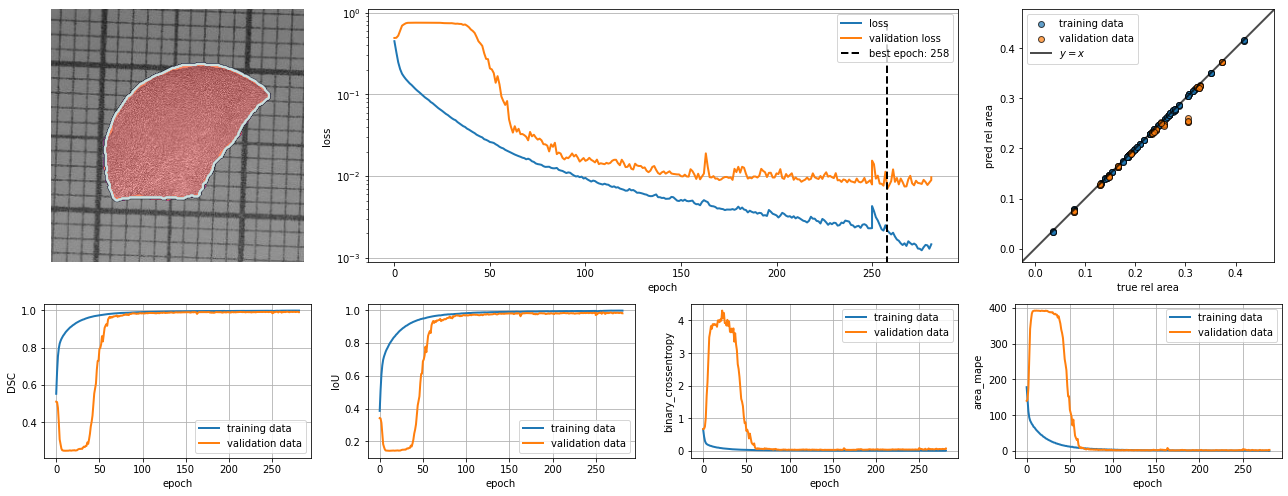

,epoch,DSC,IoU,area_mape,binary_crossentropy,loss,val_DSC,val_IoU,val_area_mape,val_binary_crossentropy,val_loss
259,258,0.997838,0.995686,0.410283,0.006128,0.002162,0.992986,0.986099,1.153924,0.040083,0.007014
268,267,0.998493,0.996991,0.355959,0.004517,0.001507,0.992537,0.985238,1.255880,0.047375,0.007463
269,268,0.998602,0.997208,0.290152,0.004078,0.001398,0.992507,0.985193,1.232979,0.047622,0.007493
257,256,0.997847,0.995703,0.490249,0.005628,0.002153,0.992356,0.984905,1.311688,0.041349,0.007644
273,272,0.998504,0.997014,0.309634,0.004816,0.001496,0.992278,0.984753,1.341684,0.050243,0.007722


6/6 [==============================] - 113s 20s/step - loss: 0.0015 - DSC: 0.9985 - IoU: 0.9971 - binary_crossentropy: 0.0054 - area_mape: 0.3552 - val_loss: 0.0097 - val_DSC: 0.9903 - val_IoU: 0.9811 - val_binary_crossentropy: 0.0713 - val_area_mape: 2.5843


In [11]:
history = unet.fit(1, unet.x_train.shape[0]//6, plot=True, period=10, ranking=5)

# TopK Loss

De forma generalizada, a função de perda TopK é definida como
$$
L_{TopK} = -\frac{1}{N} \sum_{c\in C} \sum_{i \in \mathbf{k}} g_i \ln s_i^{c},
$$
onde $\mathbf{K}$ representa os $k\%$ piores píxels. Assim, para classificação binária, a função se reduz a
$$
\begin{align}
    L_{TopK} 
    &= -\frac{1}{N} \sum_{i\,\in\,(\mathbf{k}\,\cup\,G)} \ln \hat{y}_i\\
    &= -\frac{1}{N} \left[ 
        \sum_{i \in \mathbf{k}} g_i^{(1)} \ln s_i^{(1)} + 
        \sum_{i \in \mathbf{k}} g_i^{(0)} \ln s_i^{(0)} 
    \right]\\
    &= -\frac{1}{N} \left[ 
        \sum_{i \in \,\mathbf{k} \cap G} \ln \hat{y}_i + 
        \sum_{i \in \,\mathbf{k}\setminus G} \ln (1 - \hat{y}_i)
    \right]\\
    &= \boxed{ 
    -\frac{1}{N} \sum_{i =1}^N \ln \left[
    \begin{array}{r, l}
        \hat{y}_i ,& \forall i \in \mathbf{K}\cap G\\
        (1 - \hat{y}_i) ,& \forall i \in \mathbf{K}\setminus G
    \end{array}
    \right]
    }
\end{align}
$$

Para simplificar, é conveniente definir um limite $t$ (threshold) tal que $t = Nk$, onde $0\le k\le 1$. Assim,
- Para $i\in G$, os $k\%$ piores elementos serão os menores valores para $\hat{y}_i$
- Para $i\notin G$, os $k\%$ piores elementos serão os maiores valores para $\hat{y}_i$


In [5]:
class TopK(Loss):
    def __init__(self, k, image_shape):
        super().__init__()
        assert 0 <= k <= 1
        self.N = tf.cast(tf.reduce_prod(image_shape), tf.float32)
        self.k = tf.cast(self.N*k, tf.int32) # k's threshold
    
    @tf.function
    def top_k(self, x):
        return tf.reduce_sum(tf.math.top_k(tf.reshape(x, [-1]), k=self.k, sorted=False).values)/self.N
    
    @tf.function
    def call(self, y_true, y_pred):
        loss = -tf.math.log(y_pred*y_true + (1 - y_pred)*(1 - y_true))
        return tf.map_fn(self.top_k, loss, fn_output_signature=tf.float32)

In [6]:
unet = UNet('unet_topk-10_test', dataset).load(compile=False) #.build((16, 32, 64))
unet.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=TopK(k=0.1, image_shape=x_train.shape[1:-1]),
    metrics=[DSC, IoU, binary_crossentropy, metrics.area_mape]
)

In [56]:
unet.summary()

Model: "unet_topk-10_test"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_66 (Conv2D)             (None, 256, 256, 16  160         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_60 (BatchN  (None, 256, 256, 16  64         ['conv2d_66[0][0]']              
 ormalization)                  )                                                 

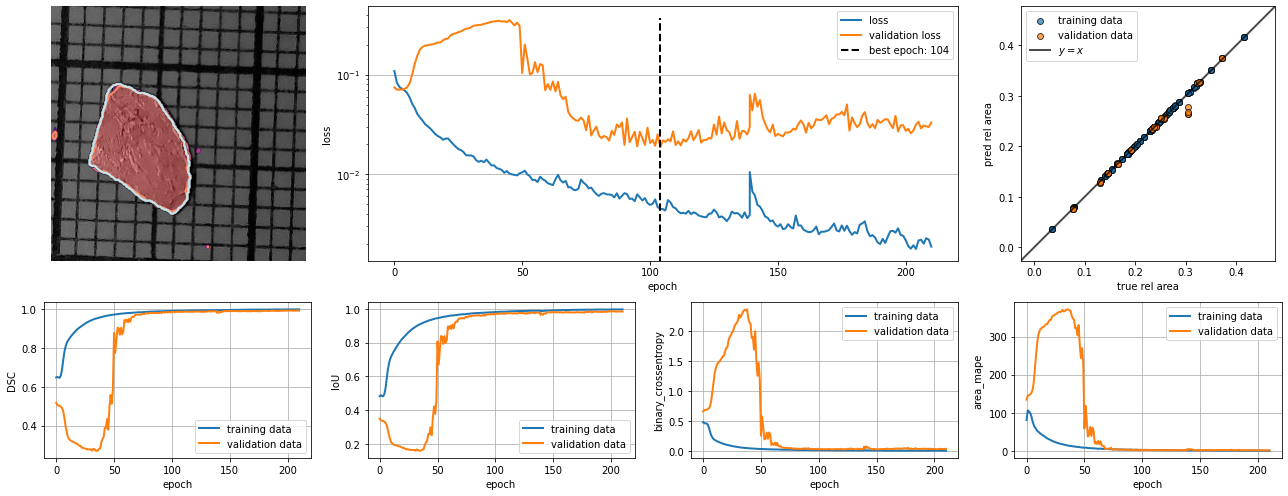

,epoch,DSC,IoU,area_mape,binary_crossentropy,loss,val_DSC,val_IoU,val_area_mape,val_binary_crossentropy,val_loss
104,104,0.991144,0.982443,2.400367,0.010095,0.004487,0.985996,0.972415,1.997458,0.024905,0.018579
95,95,0.989149,0.978534,2.911615,0.013004,0.006257,0.984328,0.969184,3.146708,0.026436,0.018961
102,102,0.990428,0.981040,2.630729,0.011435,0.005556,0.985602,0.971654,2.296359,0.025714,0.019273
112,112,0.992270,0.984658,1.836885,0.008810,0.004030,0.987176,0.974721,1.829901,0.024668,0.019414
110,110,0.991854,0.983840,2.026054,0.009484,0.004516,0.986885,0.974172,1.989788,0.025021,0.019590


6/6 [==============================] - 118s 21s/step - loss: 0.0019 - DSC: 0.9983 - IoU: 0.9965 - binary_crossentropy: 0.0024 - area_mape: 0.2559 - val_loss: 0.0331 - val_DSC: 0.9916 - val_IoU: 0.9835 - val_binary_crossentropy: 0.0337 - val_area_mape: 1.3816
Epoch 212/639
3/6 [==============>...............] - ETA: 37s - loss: 0.0020 - DSC: 0.9982 - IoU: 0.9964 - binary_crossentropy: 0.0025 - area_mape: 0.3266

In [ ]:
history = unet.fit(500, unet.x_train.shape[0]//6, plot=True, period=10, ranking=5)

# Boundary-based metric

In [ ]:
from src.data import load_all
from scipy.interpolate import splprep, splev

In [ ]:
images, masks = load_all()
images.shape, masks.shape

(TensorShape([63, 256, 256, 1]), TensorShape([63, 256, 256, 1]))

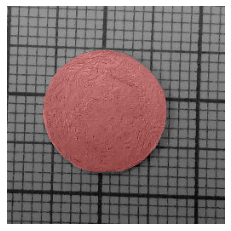

In [ ]:
i = np.random.randint(images.shape[0])
vs.plot_label(images[i], masks[i])

In [ ]:
def get_boundary(masks):
    pad = tf.pad(masks, ((0, 0), (0, 1), (0, 1), (0, 0)))
    dy = masks - pad[:, 1:, :-1]
    dx = masks - pad[:, :-1, 1:]
    return tf.reduce_any(tf.cast(tf.stack((dy, dx)), tf.bool), axis=0)    

edges = get_boundary(masks)
del_G = edges[i, ..., 0].numpy()

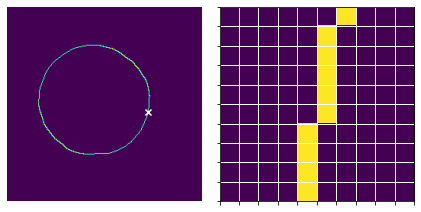

In [ ]:
fig = plt.figure(figsize=(6, 3))

X, Y = np.meshgrid(np.arange(edges.shape[2]), np.arange(edges.shape[1]))
j = np.random.randint(np.sum(del_G))
x, y = X[del_G][j], Y[del_G][j]

fig.add_subplot(121)
vs.plot_image(del_G)
plt.scatter(x, y, marker='x', c='w')

ax = fig.add_subplot(122)
ax.imshow(del_G[y-5:y+5, x-5:x+5])
ax.set_xticks(np.arange(-0.5, 10), [])
ax.set_yticks(np.arange(-0.5, 10), [])
ax.grid(True, color='w', linestyle='-', linewidth=1)

fig.tight_layout()

In [ ]:
def random_segmentation(shape, n, k=500):
    r_max = np.min(shape)/2
    d_theta = 2*np.pi/n
    theta = np.arange(0, 2*np.pi, d_theta)
    rho = np.random.randint(0, r_max, n)
    x = rho*np.cos(theta) + shape[1]/2
    y = rho*np.sin(theta) + shape[0]/2
    tck, u = splprep((np.r_[x, x[0]], np.r_[y, y[0]]), s=0, per=True)
    xi, yi = splev(np.linspace(0, 1, k), tck)
    X, Y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    Z = np.zeros(shape)
    for xn, yn in zip(xi, yi):
        Z[(X == int(xn)) & (Y == int(yn))] = 1
    return Z.astype(bool)

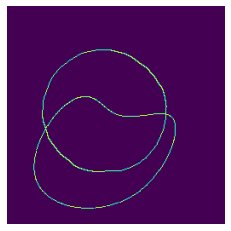

In [ ]:
fig, ax = plt.subplots()
del_S = random_segmentation(del_G.shape, 5)
vs.plot_image(del_G | del_S)

plt.show()